In [1]:
from statistics import *
from collections import Counter
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = []
files_folder = '../data_json/split10/'
for file in os.listdir(files_folder):
    if file.endswith(".json"):
        files.append(os.path.join(files_folder, file))       
data_list = merge_JsonFiles(files)
distances, num_pairs, emotion_category, doc_ids = counting(data_list)

In [3]:
print('Number of documents is %d' % len(doc_ids))

Number of documents is 1945


In [4]:
num_pair = Counter(Counter(num_pairs))
df = pd.DataFrame.from_dict(num_pair, orient='index').reset_index()
df = df.rename(columns={'index':'number of pairs in the document', 0:'number of documents'})
df

,number of pairs in the document,number of documents
0,1,1759
1,2,164
2,3,21
3,4,1


In [5]:
emotion = Counter(Counter(emotion_category))
df = pd.DataFrame.from_dict(emotion, orient='index').reset_index()
df = df.rename(columns={'index':'emotion_category', 0:'#'})
df

,emotion_category,#
0,fear,402
1,happiness,549
2,disgust,193
3,sadness,567
4,anger,282
5,surprise,85
6,happiness&fear,1
7,anger&sadness,1
8,sadness&disgust,1
9,anger&anger,1


In [6]:
distance = Counter(distances)
df = pd.DataFrame.from_dict(distance, orient='index').reset_index()
df = df.rename(columns={'index':'distance', 0:'number of pairs'})
df = df.sort_values(by=['distance'])
df

,distance,number of pairs
16,-10,1
17,-9,1
13,-7,3
4,-6,7
8,-5,7
6,-4,11
12,-3,38
2,-2,176
0,-1,1173
1,0,508


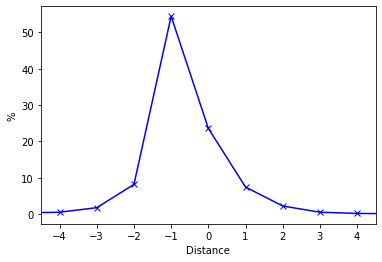

In [21]:
sum = df['number of pairs'].sum()
df['number of pairs'] = df['number of pairs']/sum * 100
fig, ax = plt.subplots()
ax.plot(df['distance'], df['number of pairs'], 'bx-')
ax.set_xlim(-4.5, 4.5)
ax.set_xlabel('Distance')
ax.set_ylabel('%')
plt.savefig('distance_distribution.png', dpi=300)